https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset/data

In [90]:
import os
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)

In [91]:
df = pd.read_csv('loan_approval.csv')
df.head(3)
orginal_df = df.copy()

In [92]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [93]:
df.city.nunique()
df.name.nunique()
df = df.drop(columns=['name','city'])

In [94]:
df.head(1)

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,False


In [95]:
num_col = [x for x in df.columns if df[x].dtypes !=object]
num_col.remove('loan_approved')
target = 'loan_approved'

In [96]:
input_df  = df[num_col]
target_df = df[target].values

<Axes: >

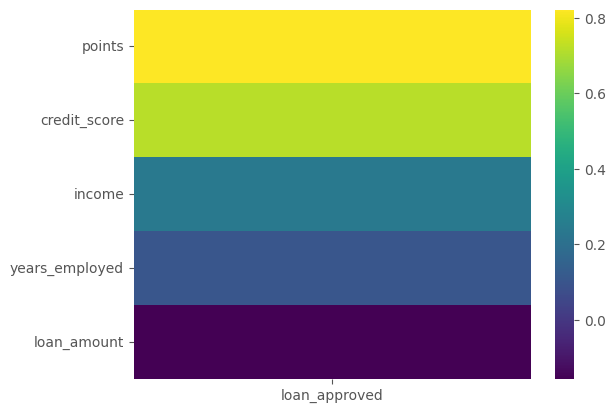

In [97]:
sns.heatmap(df.corr(numeric_only=True)['loan_approved'].to_frame().drop('loan_approved').sort_values('loan_approved',ascending=False),cmap='viridis')

In [98]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import MinMaxScaler


In [99]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [100]:
models = {'LogisticRegression': LogisticRegression(random_state=69),
    'SVC':SVC(random_state=69,kernel='rbf'),
    'RandomForestClassifier':RandomForestClassifier(random_state=69),
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state=69),
    'AdaBoostClassifier':AdaBoostClassifier(random_state=69)}


In [101]:
results = []
kf = model_selection.StratifiedKFold(n_splits=5)

for name,model in models.items():
    y_valid_all = []
    y_pred_all =[]

    for fold ,(tra_,val_) in enumerate(kf.split(X=df,y=target_df)):
        X_train = df.loc[tra_,num_col]
        y_train = df.loc[tra_,target]

        X_valid = df.loc[val_,num_col]
        y_valid=df.loc[val_,target]

        ro_scaler = MinMaxScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_valid=ro_scaler.transform(X_valid)

        model.fit(X_train,y_train)
        y_pred = model.predict(X_valid)
        y_valid_all.extend(y_valid)
        y_pred_all.extend(y_pred)


    print(classification_report(y_valid_all,y_pred_all))
    acc = roc_auc_score(y_valid_all,y_pred_all)
    print(f'The model is {name} and acc is {round(acc*100,2)}%')
    print('\n')
    results.append({'model':name,'roc_auc_score':acc})

    

              precision    recall  f1-score   support

       False       0.95      0.97      0.96      1121
        True       0.96      0.94      0.95       879

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000

The model is LogisticRegression and acc is 95.44%


              precision    recall  f1-score   support

       False       0.99      0.98      0.99      1121
        True       0.98      0.99      0.99       879

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

The model is SVC and acc is 98.8%


              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1121
        True       1.00      1.00      1.00       879

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1

In [102]:
best_model = max(results,key=lambda x:x['roc_auc_score'])
print(f'Best model is: {best_model}')

Best model is: {'model': 'RandomForestClassifier', 'roc_auc_score': 1.0}
